# 1. Exploratory Data Analysis (EDA)

### 1.1 Data Inspection

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


# Import libraries for scaling data and PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score


In [2]:
# Import data
df = pd.read_csv('credit_risk_dataset.csv')
df

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0             PERSONAL          D      35000          16.02            1   
1            EDUCATION          B       1000          11.14            0   
2              MEDICAL          C       5500          12.87            1   
3              MEDICAL          C      35000          15.23            1   
4              MEDICAL          C      35000          14.27            1   
...                ...        ...        ...            ...          ...   
32576         PERSONAL          C       5800          13.16            0   
32577         PERSONAL          A      17625           7.49            0   
32578  HOMEIMPROVEMENT          B      35000          10.99            1   
32579         PERSONAL          B      15000          11.48            0   
32580          MEDICAL          B       6475           9.99            0   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
1                     0.10                         N   
2                     0.57                         N   
3                     0.53                         N   
4                     0.55                         Y   
...                    ...                       ...   
32576                 0.11                         N   
32577                 0.15                         N   
32578                 0.46                         N   
32579                 0.10                         N   
32580                 0.15                         N   

       cb_person_cred_hist_length  
0                               3  
1                               2  
2                               3  
3                               2  
4                               4  
...                           ...  
32576                          30  
32577                          19  
32578                          28  
32579                          26  
32580                          30  

[32581 rows x 12 columns]

In [3]:
# Display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### 1.2 Data Cleaning

In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

### 1.3 Handling Outliers

In [5]:
# Drop outliers in 'person_age'
df = df[df['person_age'] < 90]

# Drop outliers in 'person_emp_length'
df = df[df['person_emp_length'] < 60]

### 1.4 Data Visualization

In [6]:
# Basic statistics
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  28495.000000   2.849500e+04       28495.000000  28495.000000   
mean      27.723530   6.643047e+04           4.781751   9657.366205   
std        6.177199   5.151374e+04           4.037958   6327.711290   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.948000e+04           2.000000   5000.000000   
50%       26.000000   5.600000e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max       84.000000   2.039784e+06          41.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28495.000000  28495.000000         28495.000000   
mean       11.045220      0.217126             0.169517   
std         3.230786      0.412296             0.106379   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.480000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                28495.000000  
mean                     5.800316  
std                      4.040800  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [7]:
# Identify continuous numerical features based on their data type (numeric)
continuous_features = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Identify categorical or discrete features based on their data type (object) or specific criteria
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove 'loan_status' from continuous_features and add it to categorical_features
if 'loan_status' in continuous_features:
    continuous_features.remove('loan_status')
    categorical_features.append('loan_status')

# Print the lists
print('Continuous numerical features:', continuous_features)
print('Categorical or discrete features:', categorical_features)

Continuous numerical features: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
Categorical or discrete features: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']


person_home_ownership
RENT        14495
MORTGAGE    11733
OWN          2174
OTHER          93
Name: count, dtype: int64


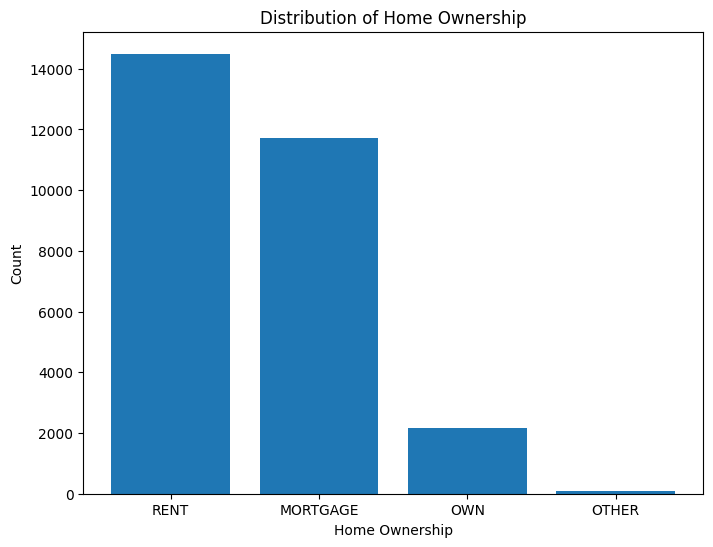

In [8]:
# person_home_ownership
print(df['person_home_ownership'].value_counts())

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(df['person_home_ownership'].value_counts().index, df['person_home_ownership'].value_counts().values)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership')
plt.show()

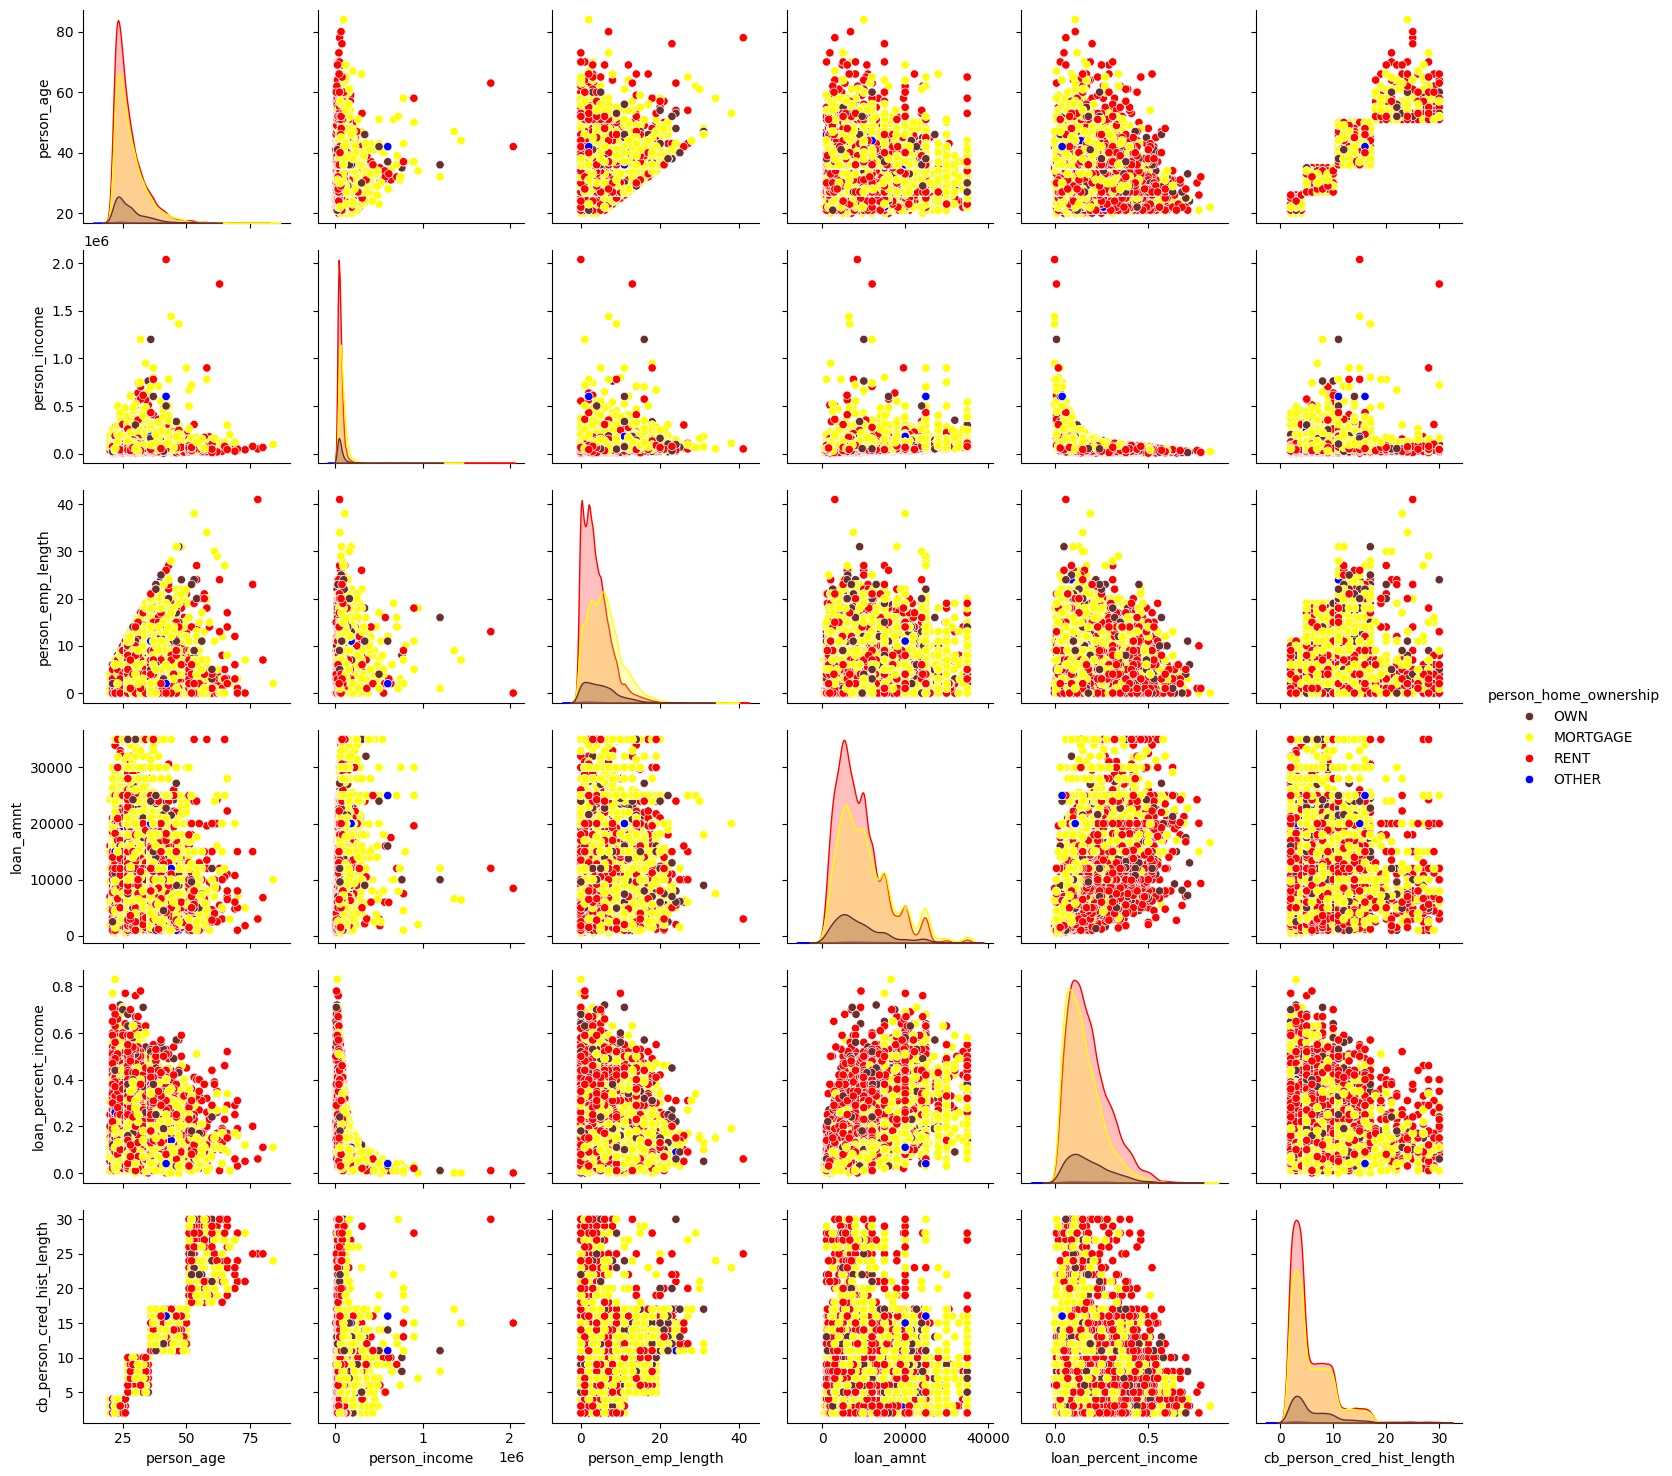

In [9]:
# Create a pairplot to visualize the relationships between continuous numerical features
# and 'person_home_ownership' in the dataset.

# Remove 'loan_int_rate' from continuous features
col_cont_minus_loan_int_rate = [col for col in continuous_features if col != 'loan_int_rate']

# Add 'person_home_ownership' to the list of continuous features for pairplot
to_plot = col_cont_minus_loan_int_rate + ['person_home_ownership']

# Create pairplot
sns.pairplot(df[to_plot], hue='person_home_ownership', palette=["#682F2F", "yellow", "red", "blue"])
plt.show()

loan_intent
EDUCATION            5668
MEDICAL              5269
VENTURE              4967
PERSONAL             4857
DEBTCONSOLIDATION    4547
HOMEIMPROVEMENT      3187
Name: count, dtype: int64


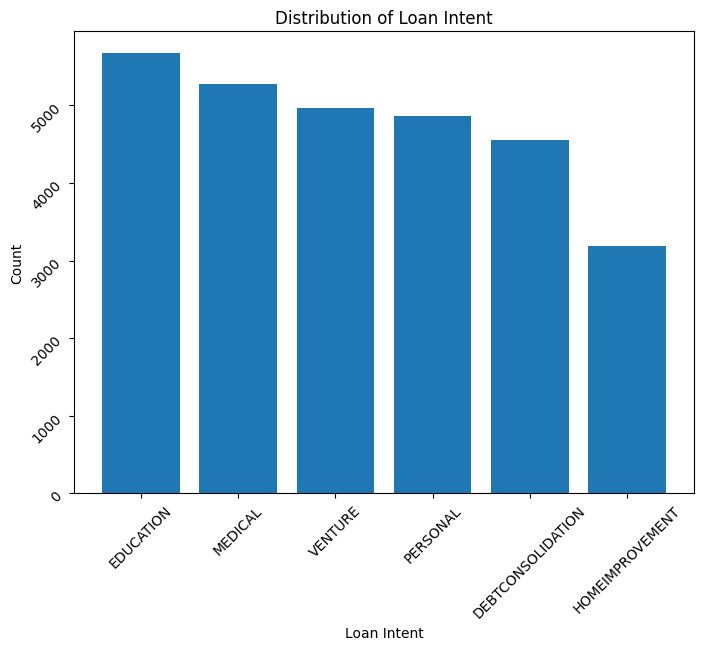

In [10]:
# loan_intent
print(df['loan_intent'].value_counts())

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(df['loan_intent'].value_counts().index, df['loan_intent'].value_counts().values)
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.title('Distribution of Loan Intent')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels diagonally
plt.show()

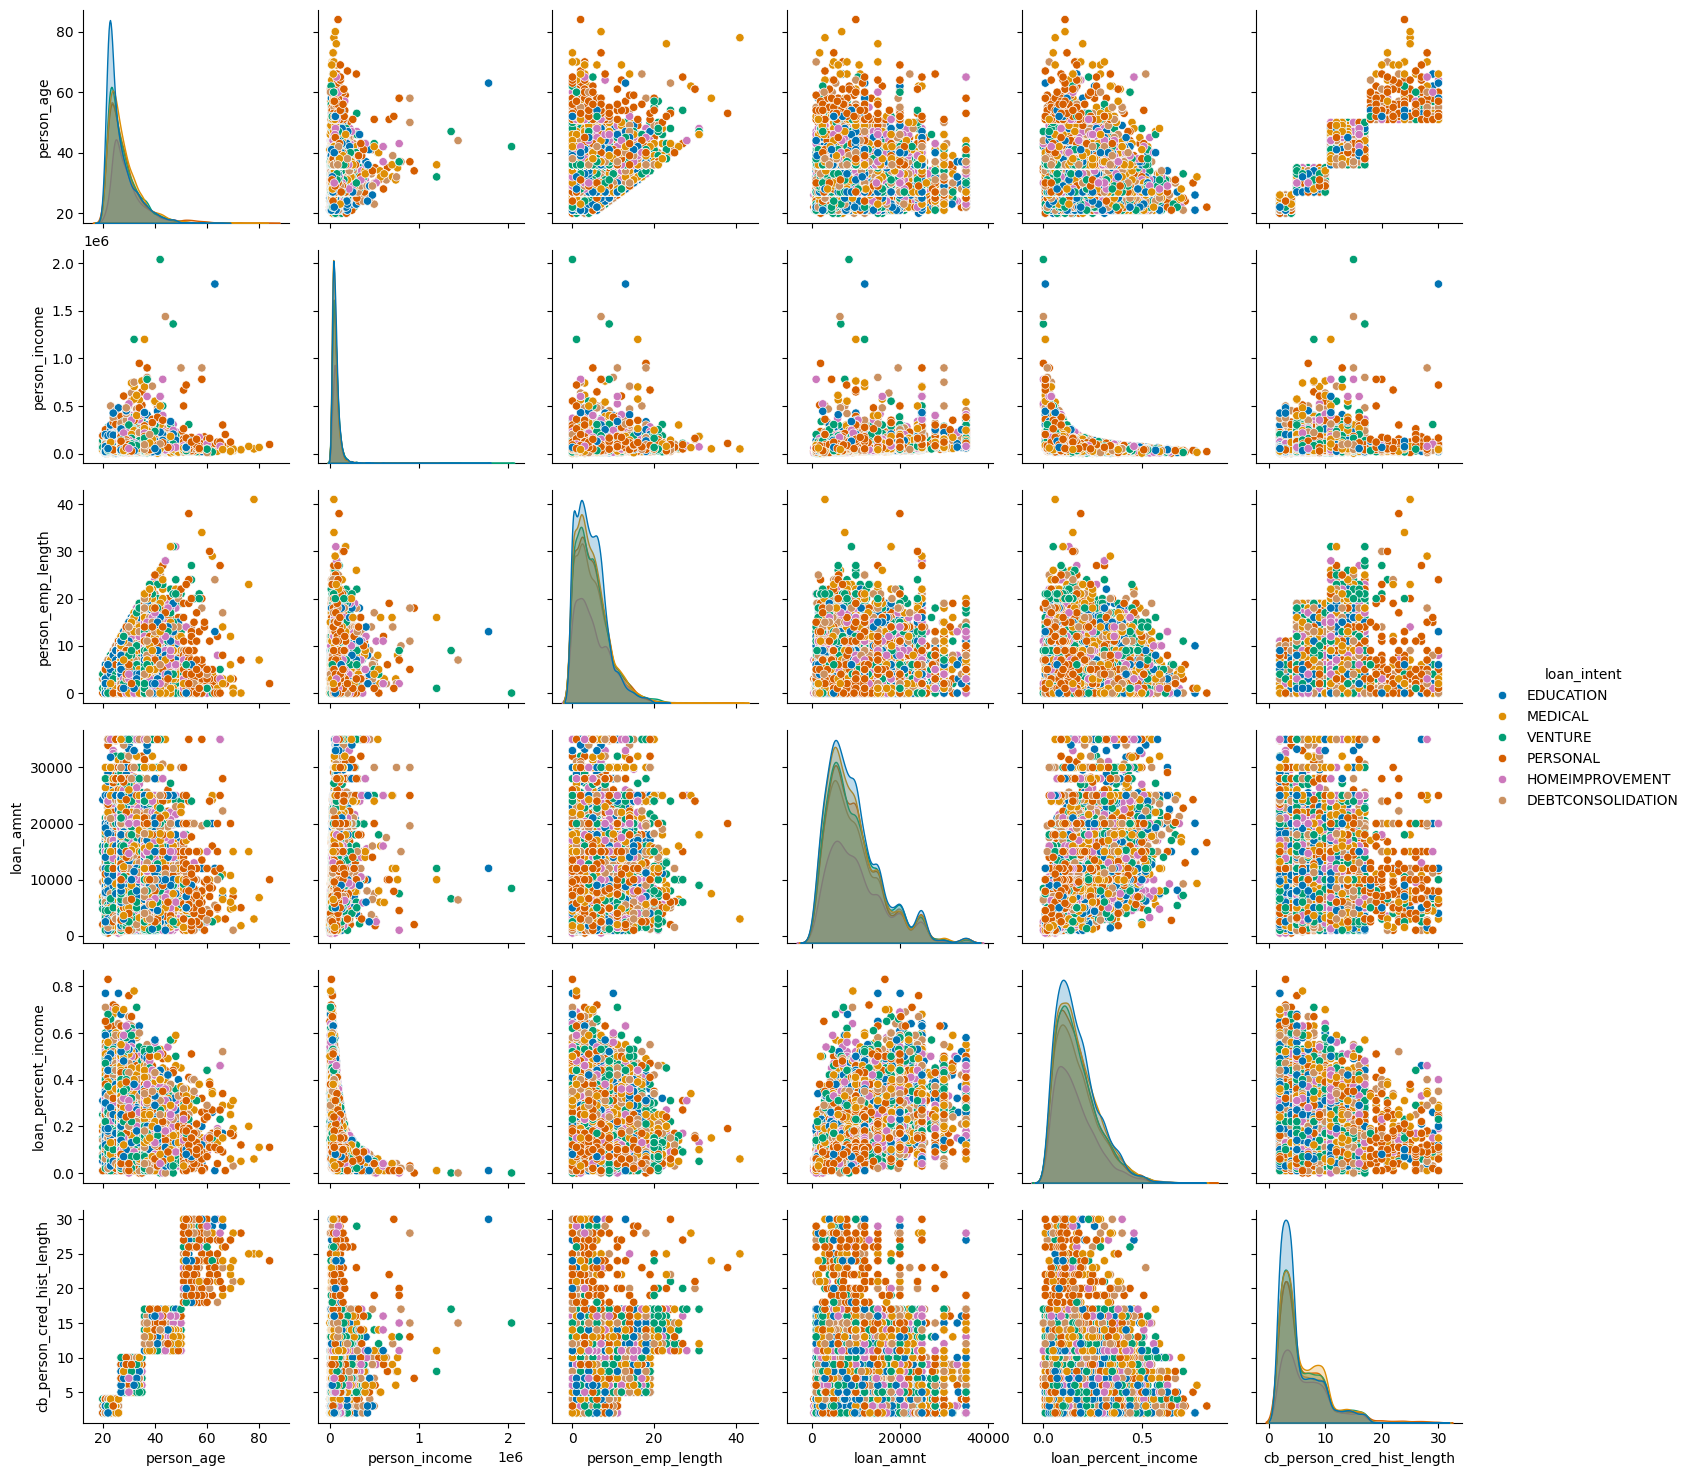

In [11]:
# This code creates a pairplot to visualize the relationships between continuous numerical features
# and the categorical feature 'loan_intent' in the dataset.

col_cont_minus_loan_int_rate = [col for col in continuous_features if col != 'loan_int_rate']
to_plot = col_cont_minus_loan_int_rate + ['loan_intent']
sns.pairplot(df[to_plot], hue = 'loan_intent', palette= ('colorblind'))

loan_grade
A    9344
B    9092
C    5680
D    3242
E     869
F     209
G      59
Name: count, dtype: int64


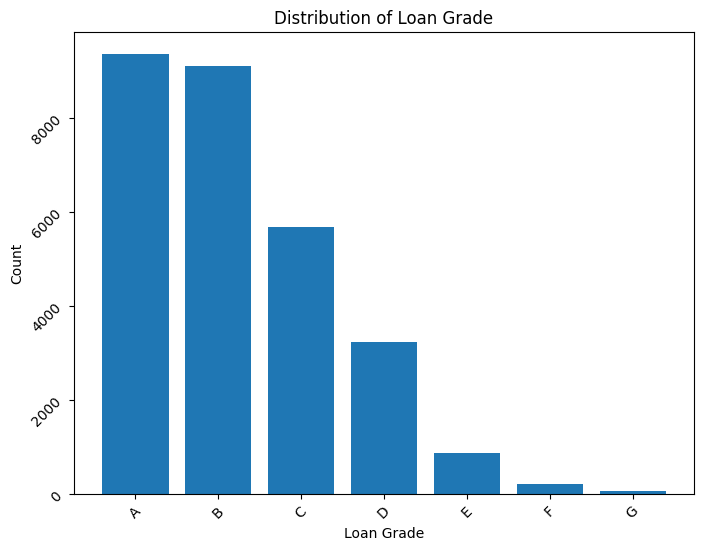

In [12]:
# Print value counts for loan_grade
print(df['loan_grade'].value_counts())

# Plotting for loan_grade
plt.figure(figsize=(8, 6))
plt.bar(df['loan_grade'].value_counts().index, df['loan_grade'].value_counts().values)
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.title('Distribution of Loan Grade')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels diagonally
plt.show()

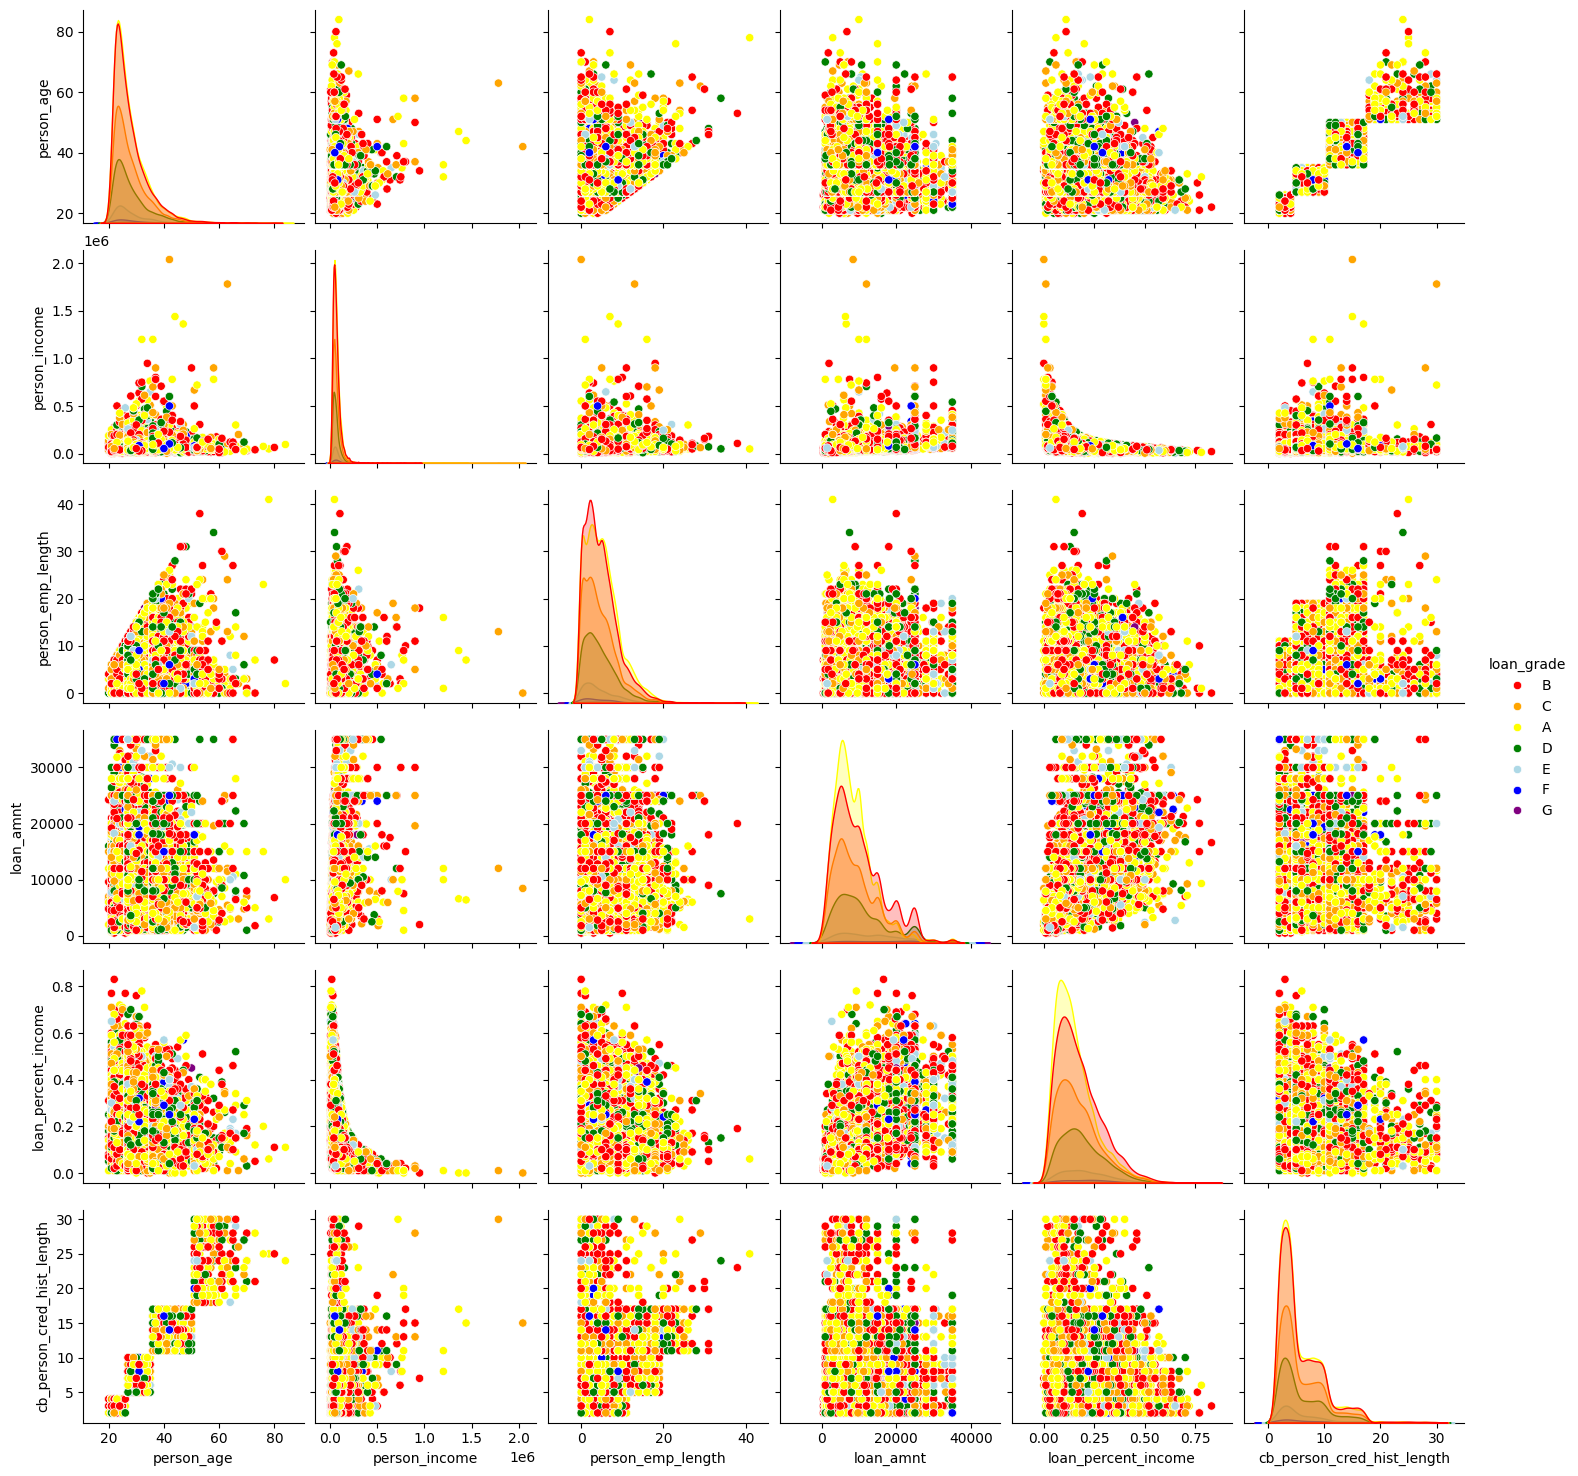

In [13]:
# This code creates a pairplot to visualize the relationships between continuous numerical features
# and the categorical feature 'loan_grade' in the dataset.

col_cont_minus_loan_int_rate = [col for col in continuous_features if col != 'loan_int_rate']
to_plot = col_cont_minus_loan_int_rate + ['loan_grade']
sns.pairplot(df[to_plot], hue='loan_grade', palette=["red", "orange", "yellow", "green", "lightblue", "blue", "purple"])
plt.show()

cb_person_default_on_file
N    23406
Y     5089
Name: count, dtype: int64


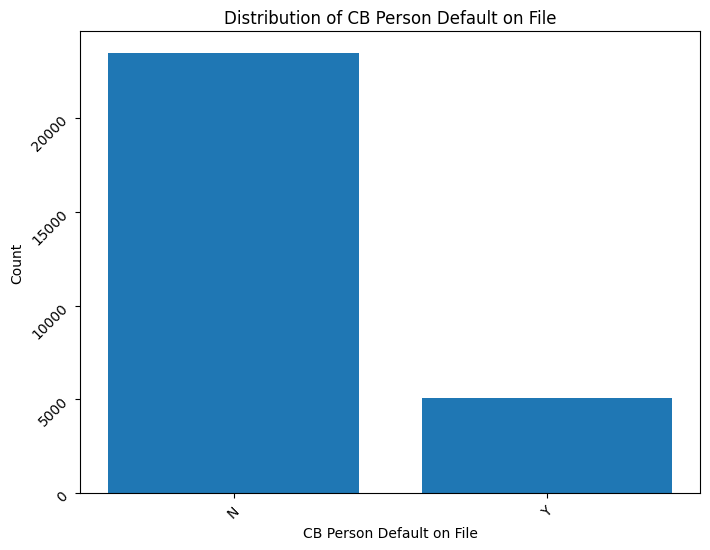

In [14]:
# Print value counts for cb_person_default_on_file
print(df['cb_person_default_on_file'].value_counts())

# Plotting for cb_person_default_on_file
plt.figure(figsize=(8, 6))
plt.bar(df['cb_person_default_on_file'].value_counts().index, df['cb_person_default_on_file'].value_counts().values)
plt.xlabel('CB Person Default on File')
plt.ylabel('Count')
plt.title('Distribution of CB Person Default on File')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels diagonally
plt.show()

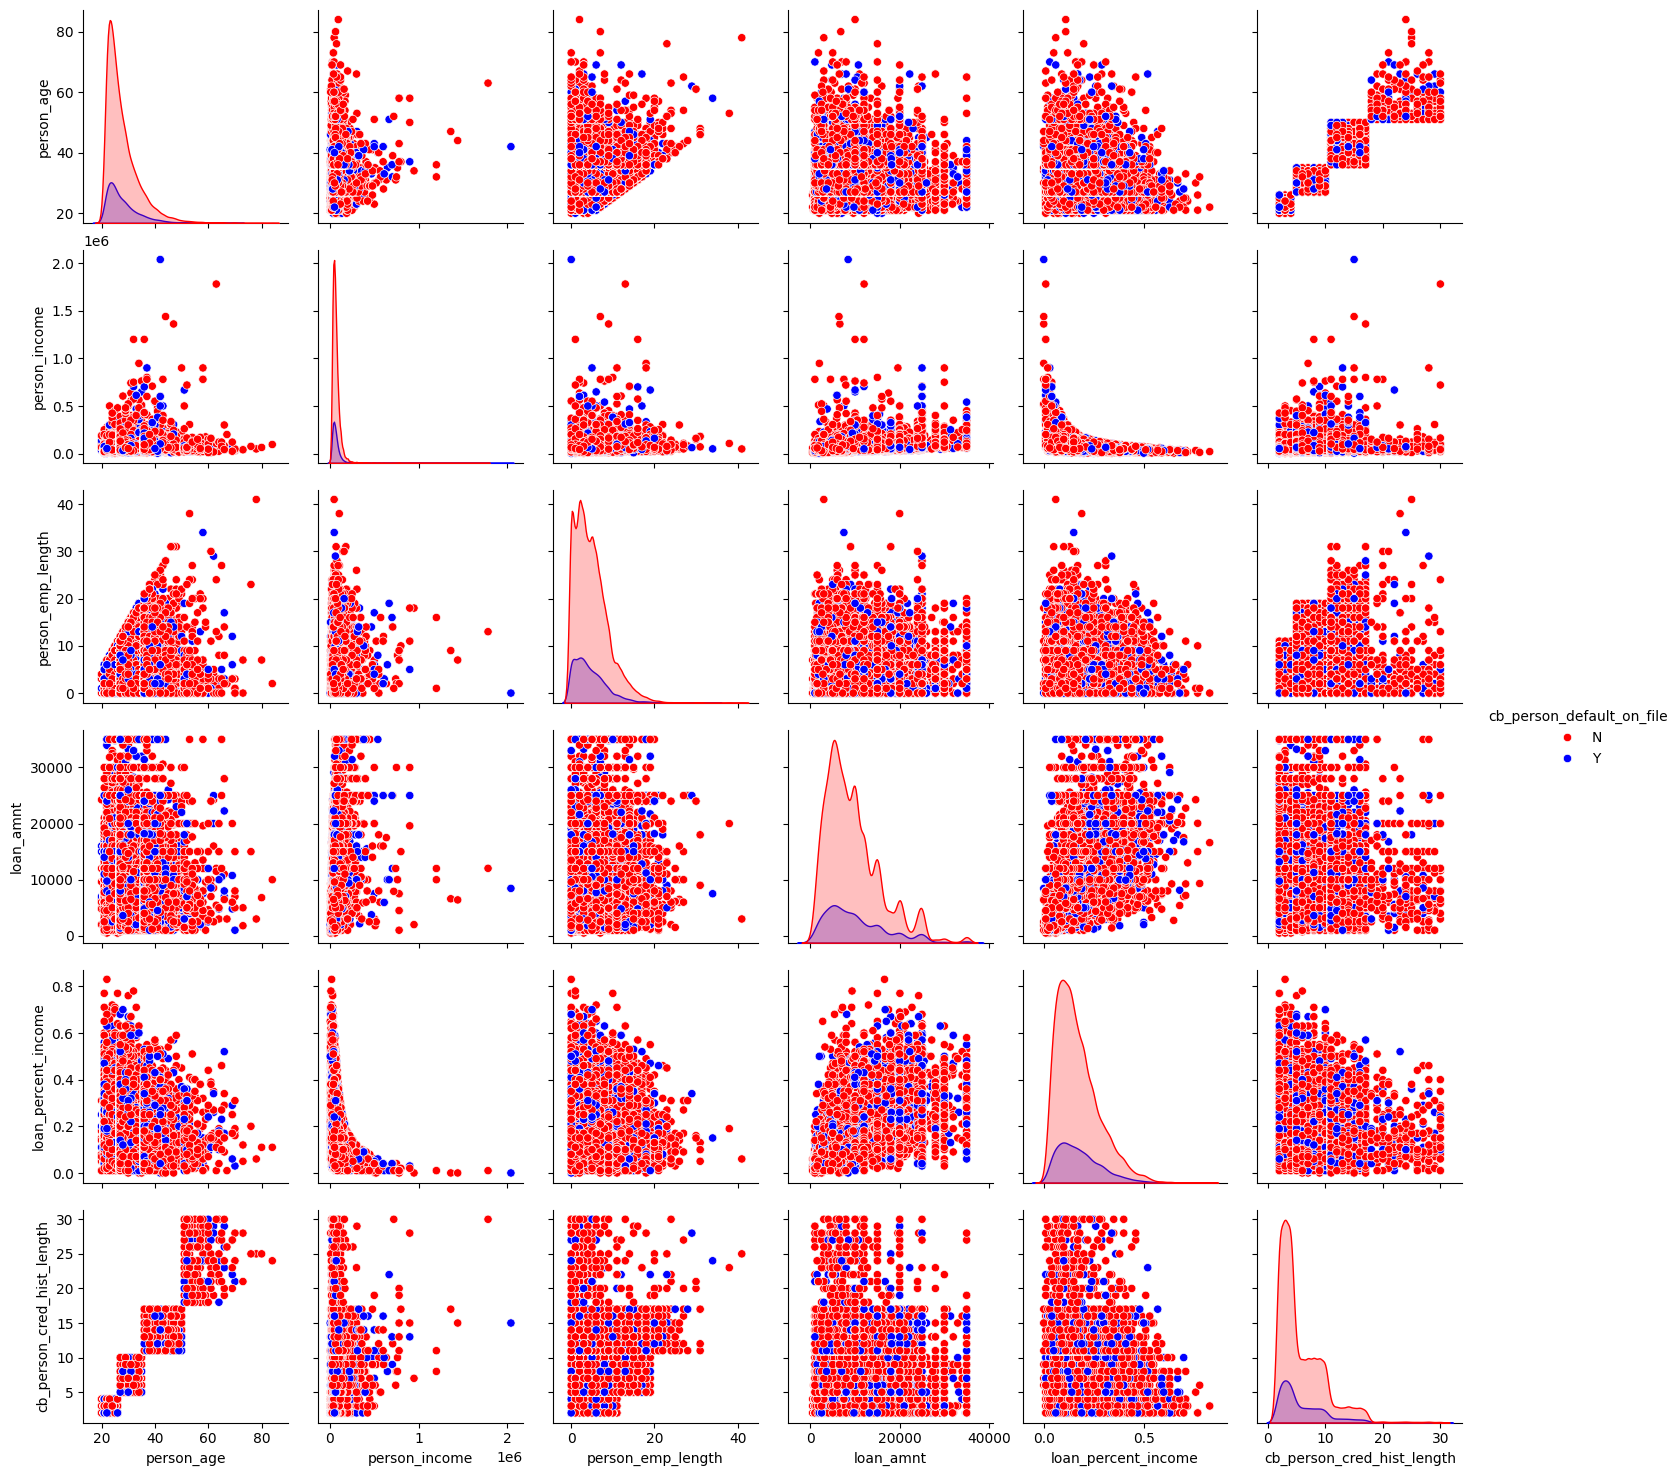

In [15]:
# This code creates a pairplot to visualize the relationships between continuous numerical features
# and the categorical feature 'cb_person_default_on_file' in the dataset.

col_cont_minus_loan_int_rate = [col for col in continuous_features if col != 'loan_int_rate']
to_plot = col_cont_minus_loan_int_rate + ['cb_person_default_on_file']
sns.pairplot(df[to_plot], hue = 'cb_person_default_on_file' , palette= (["red", "blue"]))

loan_status
0    22308
1     6187
Name: count, dtype: int64


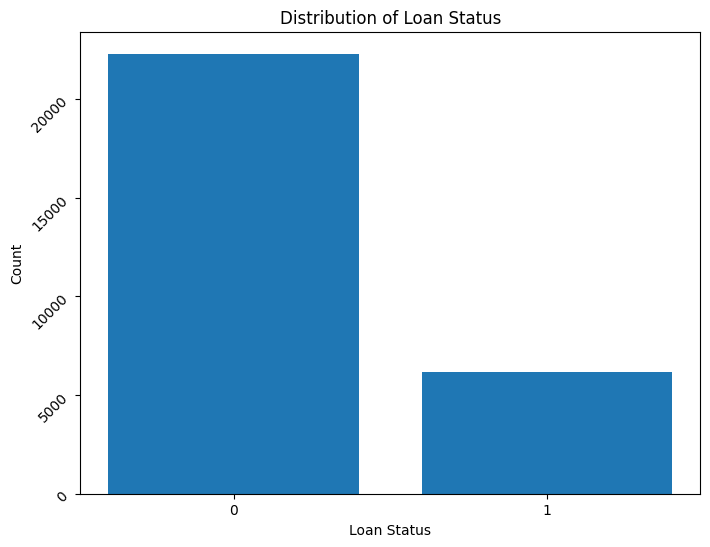

In [16]:
# Print value counts for loan_status
print(df['loan_status'].value_counts())

# Plotting for loan_status
plt.figure(figsize=(8, 6))
plt.bar([0, 1], df['loan_status'].value_counts().values)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks([0, 1])  # Set x-ticks to be 0 and 1
plt.yticks(rotation=45)  # Rotate y-axis labels diagonally
plt.show()

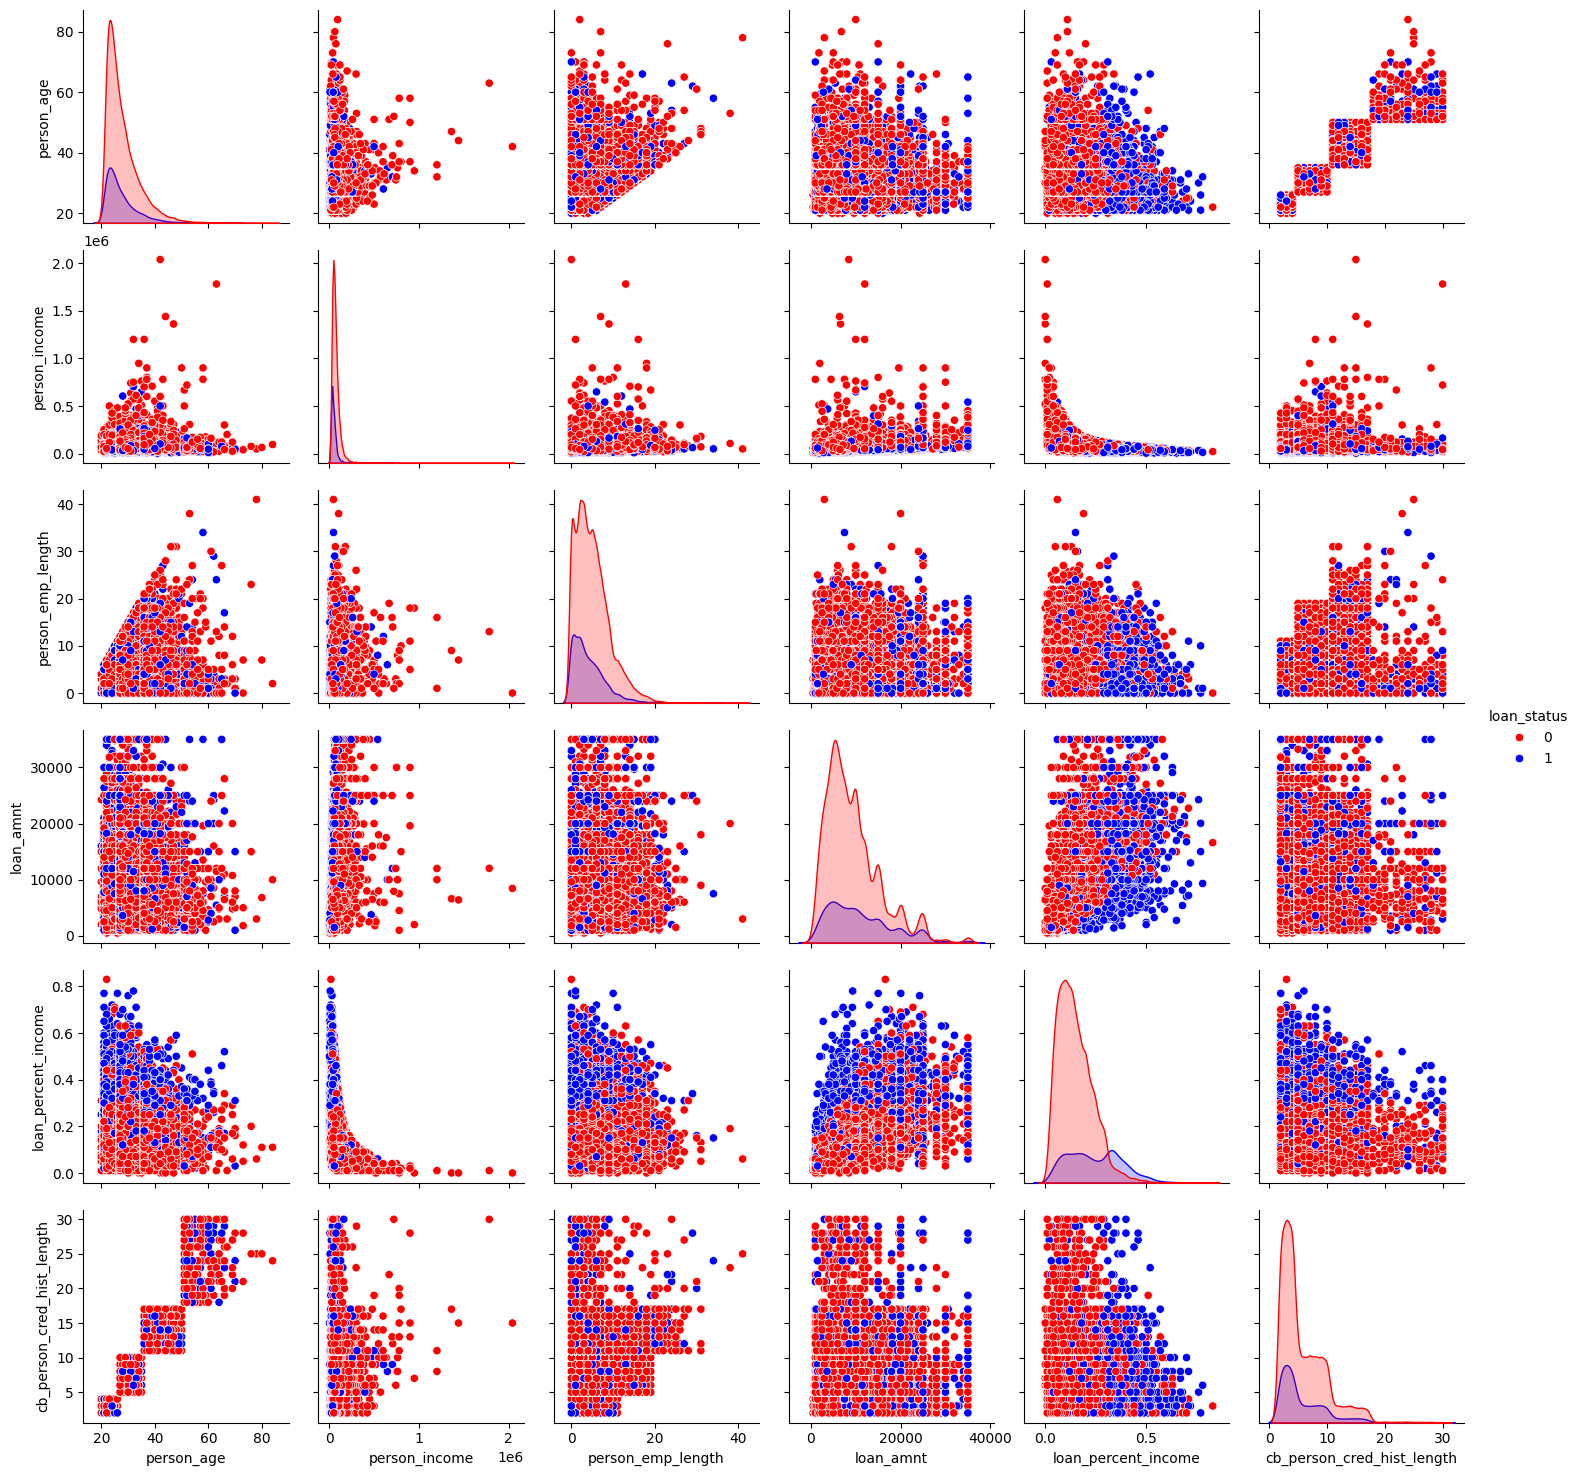

In [17]:
# This code creates a pairplot to visualize the relationships between continuous numerical features
# and the categorical feature 'cb_person_default_on_file' in the dataset.

col_cont_minus_loan_int_rate = [col for col in continuous_features if col != 'loan_int_rate']
to_plot = col_cont_minus_loan_int_rate + ['loan_status']
sns.pairplot(df[to_plot], hue = 'loan_status' , palette= (["red", "blue"]))

# 2. Data Preprocessing

### 2.1 Encoding Categorical Variables

In [18]:
le = LabelEncoder()
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['cb_person_default_on_file'] = le.fit_transform(df['cb_person_default_on_file'])

### 2.2 Scaling the Data

In [19]:
# Define the categorical and numerical features
categorical_features = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

# Separate the features and the target variable
x = df.drop(columns=['loan_status'])
y = df['loan_status']

# Separate numerical and categorical features
x_numerical = x[numerical_features]
x_categorical = x[categorical_features]

# Scale the numerical features
scaler = StandardScaler()
x_numerical_scaled = pd.DataFrame(scaler.fit_transform(x_numerical), columns=numerical_features)

# Concatenate scaled numerical features with the categorical features
x_scaled = pd.concat([x_numerical_scaled, x_categorical.reset_index(drop=True)], axis=1)
# Apply one-hot encoding to categorical columns
x_encoded = pd.get_dummies(x_scaled)

# Now you can proceed with x_scaled and y
print(x_scaled.head())

   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -1.088462      -1.103229           0.054050  -1.368191       0.029337   
1   -0.440908      -1.103229          -0.936567  -0.657021       0.564820   
2   -0.764685      -0.018063          -0.193604   4.005094       1.295305   
3   -0.602797      -0.233543           0.797013   4.005094       0.998158   
4   -1.088462      -1.097406          -0.688913  -1.131134      -1.208773   

   loan_percent_income  cb_person_cred_hist_length  person_home_ownership  \
0            -0.653501                   -0.940503                      2   
1             3.764748                   -0.693022                      0   
2             3.388727                   -0.940503                      3   
3             3.576737                   -0.445542                      3   
4             0.756578                   -0.940503                      2   

   loan_intent  cb_person_default_on_file  
0            1                

# 3. Principal Component Analysis (PCA)

### 3.1 Applying PCA

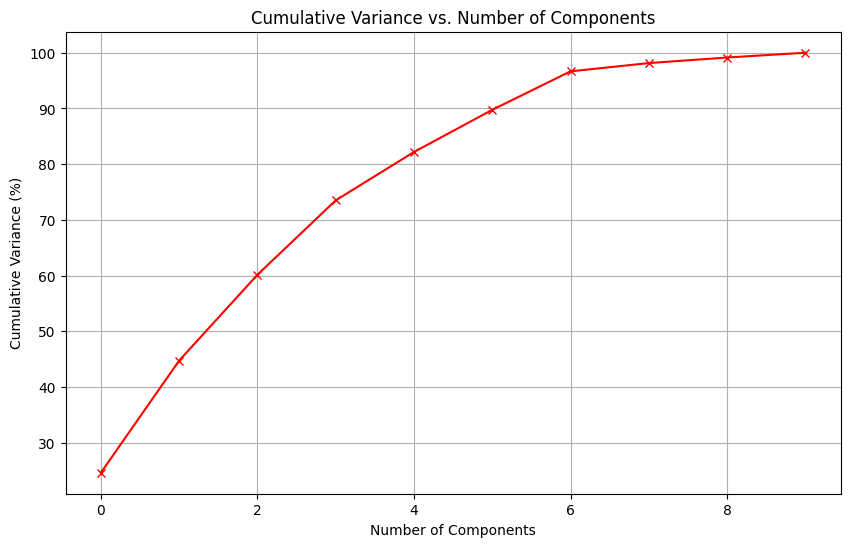

In [20]:
# Apply PCA
pca = PCA()
x_pca = pca.fit_transform(x_encoded)

# Convert to DataFrame
x_pca_df = pd.DataFrame(x_pca)

# Variance explained by each component
var = pca.explained_variance_ratio_

# Cumulative variance
cum_var = np.cumsum(np.round(var, decimals=4) * 100)
plt.figure(figsize=(10, 6))
plt.plot(cum_var, 'r-x')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')
plt.title('Cumulative Variance vs. Number of Components')
plt.grid(True)
plt.show()

### 3.2 Selecting Components

In [21]:
# Keeping components that explain 95% of the variance
x_pca_df = x_pca_df.iloc[:, :7]

In [22]:
x_pca_df.head()

0         1         2         3         4         5         6
0 -1.653180 -1.112656 -1.304669 -1.203921 -0.354886 -0.441435 -0.755785
1  0.339304 -0.316945 -1.103686  2.331629 -2.352528 -1.598220  0.513226
2  0.362108 -1.640296  0.453257  5.362352  0.229531  0.699399  0.085908
3  0.424815 -1.280520  0.939586  5.379719 -0.138458  0.903287 -0.767690
4  2.309652 -1.505667 -1.671943 -0.413622 -1.442124  0.359555  0.325556

# 4. Building the Logistic Regression Model

### 4.1 Train-Test Split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_pca_df, y, test_size=0.2)

### 4.2 Model Training and Evaluation

Confusion Matrix:
 [[4198  223]
 [ 735  543]]
F1 Score: 0.5313111545988258


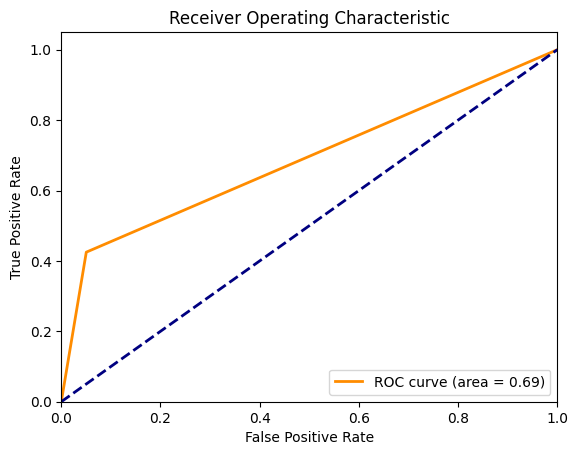

In [24]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
 from imblearn.over_sampling import SMOTE

# Balancing data in loan_status - Oversampling
smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 6)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)
print(len(x_train_sm))
print(len(y_train_sm))

35774
35774


In [26]:
 from imblearn.under_sampling import RandomUnderSampler

# Balancing data in loan_status - undersampling
rus = RandomUnderSampler(sampling_strategy='majority')
x_train_us, y_train_us = rus.fit_resample(x_train, y_train)
print(len(x_train_us))
print(len(y_train_us))

9818
9818


In [27]:
# Logistic model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = 'sigmoid') # The sigmoid function transforms
 ])
# We compile the model, we create the requirements with which we will evaluate the mod
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
 )

# Train model
model.fit(
    x_train_sm,
    y_train_sm,
    epochs = 100,
    batch_size = 32,
    verbose = 0
 )

In [28]:
# Evaluate model with test set (x_test and y_test)
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Model accuracy : {accuracy*100:.2f}%')
print(f'Average error committed by the model: {loss:.3f}')

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7434 - loss: 0.5108
Model accuracy : 74.63%
Average error committed by the model: 0.505


In [29]:
# Prediction with x_train to compare results with y_train
y_pred_train = model.predict(x_train_sm)

1118/1118 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [30]:
# y_train_sm original
y_train_sm_original = np.array(y_train_sm)

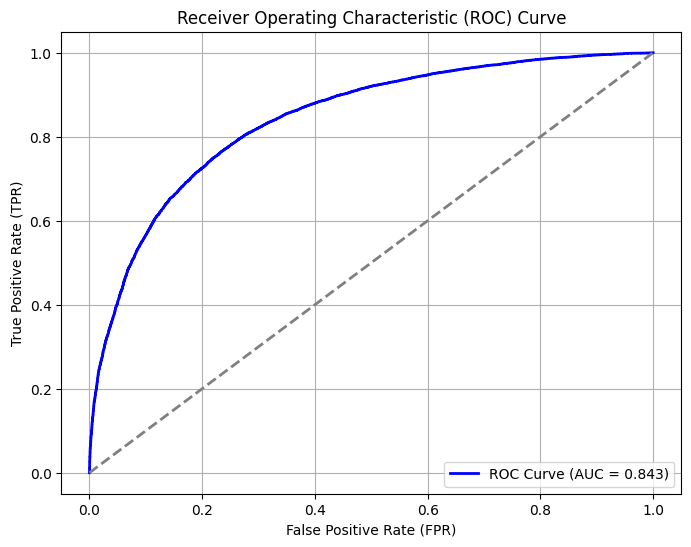

AUC Score: 0.843
An AUC of 0.843 indicates that the model has good discrimination ability between classes.


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_train_sm_original are the true labels and y_pred_train are the predicted probabilities

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train_sm_original, y_pred_train)

# Calculate the area under the ROC curve (AUC)
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.3f})'.format(auc_score))
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')  # Diagonal line for reference (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Display the AUC result with interpretation
print('AUC Score: {:.3f}'.format(auc_score))
if auc_score == 0.5:
    print('An AUC of 0.5 indicates that the model is no better than random at distinguishing between classes.')
elif auc_score < 0.5:
    print('An AUC of {:.3f} indicates that the model performs worse than random at distinguishing between classes.'.format(auc_score))
elif auc_score < 0.7:
    print('An AUC of {:.3f} indicates that the model has poor discrimination ability between classes.'.format(auc_score))
elif auc_score < 0.8:
    print('An AUC of {:.3f} indicates that the model has acceptable discrimination ability between classes.'.format(auc_score))
elif auc_score < 0.9:
    print('An AUC of {:.3f} indicates that the model has good discrimination ability between classes.'.format(auc_score))
else:
    print('An AUC of {:.3f} indicates that the model has excellent discrimination ability between classes.'.format(auc_score))


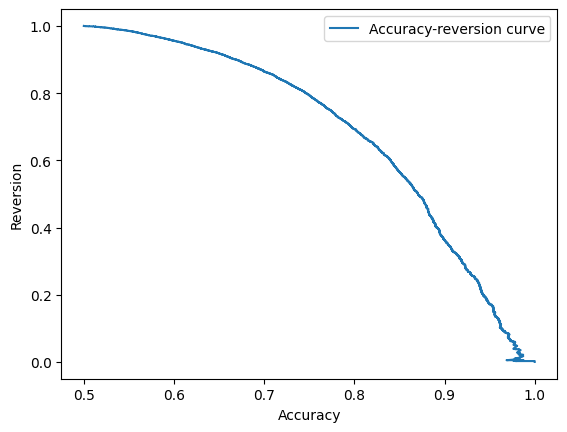

Precision: It focuses on the accuracy of positive predictions. It measures how well the model is at identifying true positives from the positive predictions.
Recall: It focuses on the completeness of positive predictions. It measures how well the model is at identifying all the actual positives.
An ideal model would have a precision-recall curve that approaches the top right corner, indicating high precision and high recall.


In [32]:
 # Calculate accuracy and revocation
 precision, recall, _ = precision_recall_curve(y_train_sm_original, y_pred_train)
 # Plot
 plt.plot(precision, recall, label='Accuracy-reversion curve')
 plt.xlabel('Accuracy')
 plt.ylabel('Reversion')
 plt.legend()
 plt.show()

# Precision and Recall explanations
print('Precision: It focuses on the accuracy of positive predictions. It measures how well the model is at identifying true positives from the positive predictions.')
print('Recall: It focuses on the completeness of positive predictions. It measures how well the model is at identifying all the actual positives.')

# Ideal Precision-Recall Curve
print('An ideal model would have a precision-recall curve that approaches the top right corner, indicating high precision and high recall.')


In [33]:
 # Create the confusion matrix
 confusion_matrix = confusion_matrix(y_train_sm, y_pred_train > 0.5)
 # Print the confusion matrixValueError: Found input variables with inconsistent numbers of samples: [35686, 700]

 print(confusion_matrix)

[[13293  4594]
 [ 3832 14055]]


In [34]:
print('___________________________________________________________________')
print('13,293: Correctly predicted positive cases (True Positives)')
print('4,594: Incorrectly predicted positive cases (False Positives)')
print('3,832: Incorrectly predicted negative cases (False Negatives)')
print('14,055: Correctly predicted negative cases (True Negatives)')
print('___________________________________________________________________')

___________________________________________________________________
13,293: Correctly predicted positive cases (True Positives)
4,594: Incorrectly predicted positive cases (False Positives)
3,832: Incorrectly predicted negative cases (False Negatives)
14,055: Correctly predicted negative cases (True Negatives)
___________________________________________________________________


In [35]:
 y_pred_binario = model.predict(x_test) > 0.5

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step


In [36]:
 f1 = f1_score(y_test, y_pred_binario, average='binary')  # 'binary' para clases desequ
 print(f"F1-score: {f1}")

F1-score: 0.5759530791788856
